In [2]:
import pandas as pd
import seaborn as sns

pd.options.display.max_rows = 9999
pd.options.display.max_columns = 999

In [3]:
requests_22 = pd.read_csv(
    "../data/raw/311_City_Service_Requests_in_2022.csv.gz",
    parse_dates=(
        [
            "RESOLUTIONDATE",
            "SERVICEDUEDATE",
            "SERVICEORDERDATE",
            "INSPECTIONDATE",
            "CREATED",
            "EDITED",
        ]
    ),
    low_memory=False,
)
requests_23 = pd.read_csv(
    "../data/raw/311_City_Service_Requests_in_2023.csv.gz",
    parse_dates=(
        [
            "RESOLUTIONDATE",
            "SERVICEDUEDATE",
            "SERVICEORDERDATE",
            "INSPECTIONDATE",
            "CREATED",
            "EDITED",
        ]
    ),
    low_memory=False,
)

In [4]:
sum(requests_22.columns != requests_23.columns), sum(
    requests_22.dtypes != requests_23.dtypes
)

(0, 0)

In [5]:
def cleanup(df):
    df.columns = [c.lower() for c in df.columns]
    df["resolutiondate_date"] = df.resolutiondate.dt.date
    df["serviceduedate_date"] = df.serviceduedate.dt.date
    df["serviceorderdate_date"] = df.serviceorderdate.dt.date
    df["inspectiondate_date"] = df.inspectiondate.dt.date
    df["created_date"] = df.created.dt.date
    df["edited_date"] = df.edited.dt.date
    return df

In [6]:
requests_22 = cleanup(requests_22)
requests_23 = cleanup(requests_23)

In [7]:
requests_23.shape

(425225, 42)

In [8]:
requests_23.columns

Index(['x', 'y', 'objectid', 'servicecode', 'servicecodedescription',
       'servicetypecodedescription', 'organizationacronym', 'servicecallcount',
       'adddate', 'resolutiondate', 'serviceduedate', 'serviceorderdate',
       'inspectionflag', 'inspectiondate', 'inspectorname',
       'serviceorderstatus', 'status_code', 'servicerequestid', 'priority',
       'streetaddress', 'xcoord', 'ycoord', 'latitude', 'longitude', 'city',
       'state', 'zipcode', 'maraddressrepositoryid', 'ward', 'details',
       'gis_id', 'globalid', 'creator', 'created', 'editor', 'edited',
       'resolutiondate_date', 'serviceduedate_date', 'serviceorderdate_date',
       'inspectiondate_date', 'created_date', 'edited_date'],
      dtype='object')

<Axes: xlabel='resolutiondate_date'>

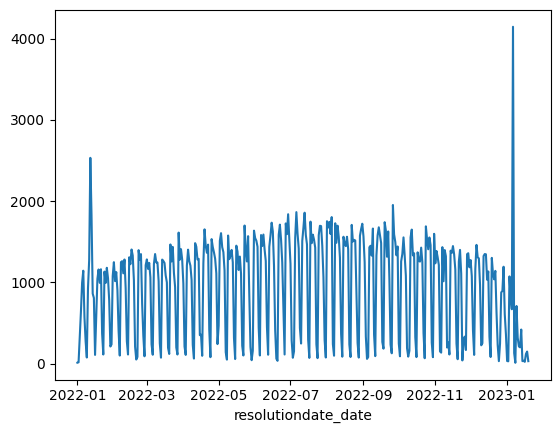

In [9]:
requests_22.resolutiondate_date.value_counts().sort_index().plot()

<Axes: xlabel='resolutiondate_date'>

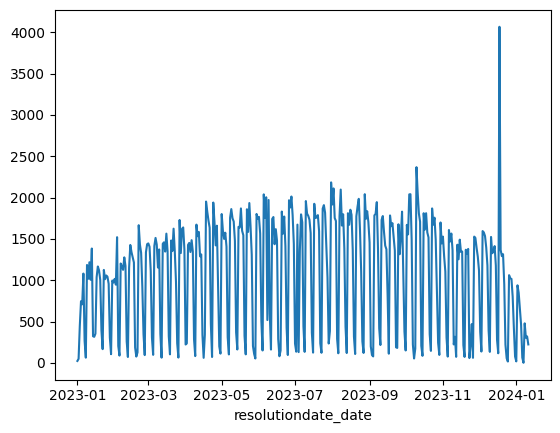

In [10]:
requests_23.resolutiondate_date.value_counts().sort_index().plot()

In [11]:
requests_23.groupby(["organizationacronym", "serviceorderstatus"]).globalid.count()

organizationacronym  serviceorderstatus  
CFSA                 Closed                      25
DC Water             Closed                     108
DDOT                 Canceled                   183
                     Closed                   72787
                     In-Progress              11503
                     Open                         1
DFHV                 Canceled                     1
                     Closed                      28
                     Open                        10
DGS                  Canceled                     1
                     Closed                     606
                     Closed (Duplicate)           8
                     Open                       114
                     Open (Duplicate)             1
DMV                  Canceled                    47
                     Closed                    6407
                     Open                         2
DOB                  Canceled                    29
                     C

In [12]:
requests_23.organizationacronym.value_counts() / len(requests_23)

organizationacronym
DPW         0.688610
DDOT        0.198657
DOH         0.043462
OUC         0.035727
DMV         0.015183
DOB         0.011855
DOEE        0.002168
DGS         0.001717
ORM         0.001658
FEMS        0.000329
DC Water    0.000254
DFHV        0.000092
CFSA        0.000059
Name: count, dtype: float64

In [13]:
requests_23.servicecodedescription.value_counts()

servicecodedescription
Bulk Collection                                                                                67865
Parking Enforcement                                                                            57410
Scheduled Yard Waste                                                                           27647
Rodent Inspection and Treatment                                                                17831
Illegal Dumping                                                                                16481
Trash Collection - Missed                                                                      16269
Streetlight Repair Investigation                                                               16238
Sanitation Enforcement                                                                         14649
Roadway Signs                                                                                  14554
DC Government Information                                           

In [21]:
requests_23.organizationacronym.value_counts()

organizationacronym
DPW         292814
DDOT         84474
DOH          18481
OUC          15192
DMV           6456
DOB           5041
DOEE           922
DGS            730
ORM            705
FEMS           140
DC Water       108
DFHV            39
CFSA            25
Name: count, dtype: int64

<Axes: xlabel='resolutiondate_date'>

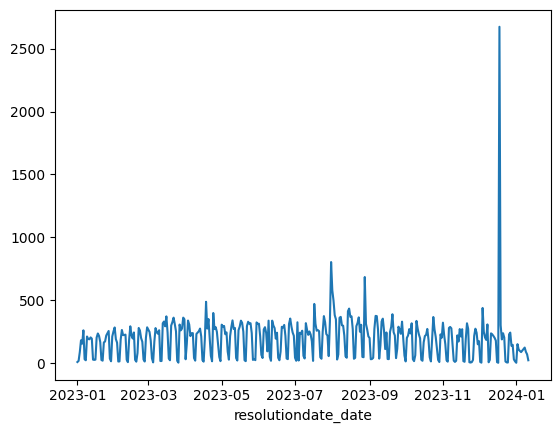

In [28]:
requests_23[
    requests_23.organizationacronym == "DDOT"
].resolutiondate_date.value_counts().plot()